In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import sys


from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

print('Successfully imported libraries')

ModuleNotFoundError: No module named 'xgboost'

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import sys


from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from 



print('Successfully imported libraries')

ModuleNotFoundError: No module named 'xgboost'

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import sys


from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier

print('Successfully imported libraries')

Successfully imported libraries


In [6]:
train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('processed_test.csv')
print('Successfully loaded data')

Successfully loaded data


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.shape

(891, 12)

In [9]:
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
total = train_df.isnull().sum().sort_values()
percent = total / train_df.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.002245


In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

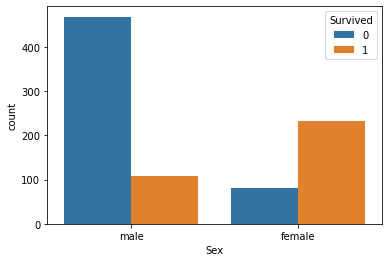

In [13]:
sns.countplot(x = 'Sex',data = train_df,hue = 'Survived')
plt.show()

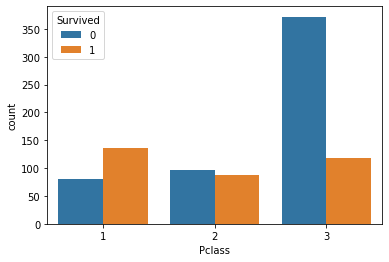

In [14]:
sns.countplot(x = 'Pclass',data = train_df,hue = 'Survived')
plt.show()

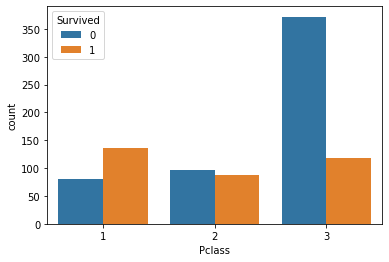

In [15]:
sns.countplot(x = 'Pclass',data = train_df,hue = 'Survived')
plt.show()

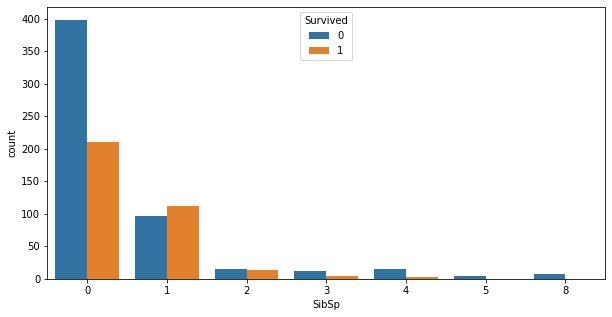

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'SibSp',data = train_df,hue = 'Survived')
plt.show()

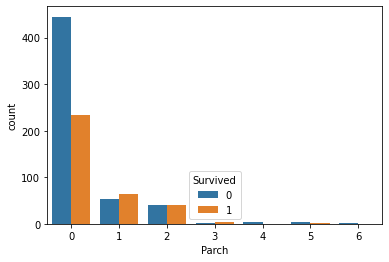

In [17]:
sns.countplot(x = 'Parch',data = train_df,hue = 'Survived')
plt.show()

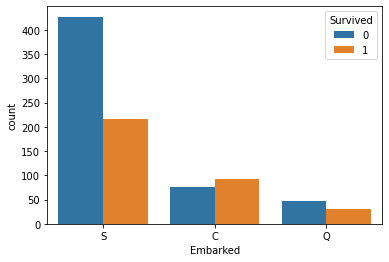

In [18]:
sns.countplot(x = 'Embarked',data = train_df,hue = 'Survived')
plt.show()

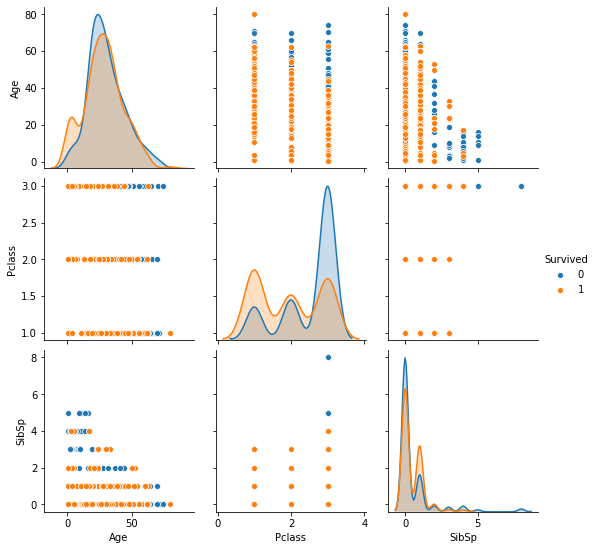

In [19]:
sns.pairplot(data = train_df, hue = 'Survived', vars = ['Age','Pclass','SibSp'])

# Using correlation Matrix

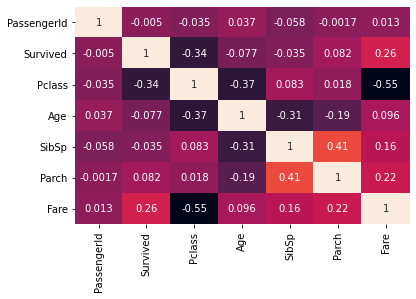

In [20]:
cor = train_df.corr()
sns.heatmap(cor, cbar = False, annot = True)

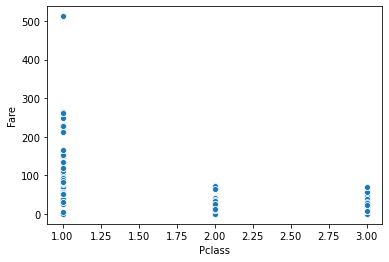

In [21]:

sns.scatterplot(x = 'Pclass', y = 'Fare', data = train_df )

In [22]:
titles = set()
for name in train_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Master', 'Dr', 'Capt', 'Jonkheer', 'Miss', 'Mrs', 'Sir', 'Mme', 'Ms', 'Mlle', 'Col', 'Mr', 'the Countess', 'Lady', 'Major', 'Rev', 'Don'}


In [23]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
 
def get_titles(train_df):
    train_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    train_df['Title'] = train_df.Title.map(Title_Dictionary)
    return train_df

In [24]:
train_df = get_titles(train_df)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [26]:
train_df[train_df['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


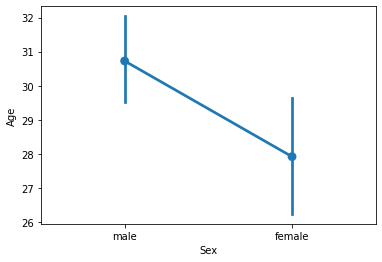

In [27]:
sns.pointplot(x = 'Sex', y = 'Age', data = train_df)

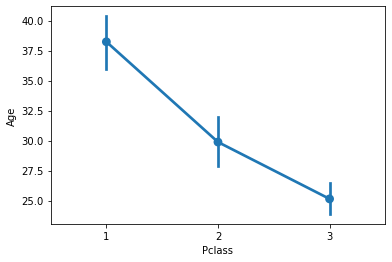

In [28]:
sns.pointplot(x = 'Pclass', y = 'Age', data = train_df)

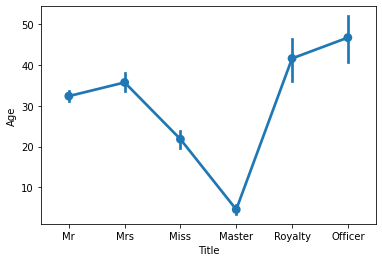

In [29]:
sns.pointplot(x = 'Title', y = 'Age', data = train_df)

In [30]:
x = train_df.groupby(['Pclass','Title','Sex']).median()
grouped_median_train = x['Age'].reset_index()
grouped_median_train

,Pclass,Title,Sex,Age
0,1,Master,male,4.0
1,1,Miss,female,30.0
2,1,Mr,male,40.0
3,1,Mrs,female,40.0
4,1,Officer,female,49.0
5,1,Officer,male,51.0
6,1,Royalty,female,40.5
7,1,Royalty,male,40.0
8,2,Master,male,1.0
9,2,Miss,female,24.0


In [31]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global train_df
    train_df['Age'] = train_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return train_df

In [32]:
train_df = process_age()

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [34]:
def process_cabin():
    global train_df    
    train_df.Cabin.fillna('U', inplace=True)
    train_df['Cabin'] = train_df['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(train_df['Cabin'], prefix='Cabin')    
    train_df = pd.concat([train_df, cabin_dummies], axis=1)
    train_df.drop('Cabin', axis=1, inplace=True)
    return train_df

In [35]:
train_df = process_cabin()

In [36]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,0,0,0,0,0,0,1


In [37]:
train_df['Family Size'] = train_df['Parch'] + train_df['SibSp'] + 1
train_df['Alone'] = train_df['Family Size'].map(lambda c : 1 if c==1 else 0 )
train_df['Not_Alone'] = train_df['Family Size'].map(lambda c : 1 if c > 1 else 0 )

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family Size,Alone,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,1,1,0


In [39]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

NameError: name 'data' is not defined

In [40]:
data = [train_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

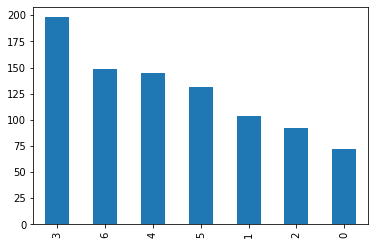

In [41]:
train_df['Age'].value_counts().plot(kind = 'bar')

In [42]:
train_df['Fare'].astype(int)
data = [train_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] == 6, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 7, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 70), 'Fare'] = 5

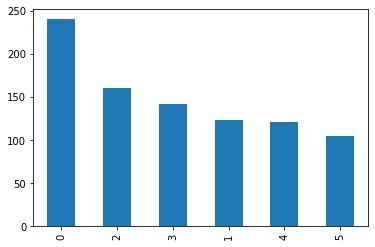

In [43]:
train_df['Fare'].value_counts().plot(kind = 'bar')

In [44]:
train_df.drop(['Ticket'], axis = 1, inplace = True)

In [45]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [46]:
x = pd.get_dummies(train_df['Sex'],drop_first = True)
train_df = pd.concat([train_df,x],axis = 1)
train_df = pd.concat([train_df, pd.get_dummies(train_df['Title'], prefix = 'Title')],axis = 1)
train_df = pd.concat([train_df, pd.get_dummies(train_df['Embarked'], prefix = 'Embarked')],axis = 1)

In [47]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,...,male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,0,S,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,5,C,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,0,S,...,0,0,1,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,4,S,...,0,0,0,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,1,S,...,1,0,0,1,0,0,0,0,0,1


In [48]:
train_df.drop(['Embarked_C', 'Title_Royalty', 'Cabin_T'], axis = 1, inplace = True)
train_df.drop(['Sex'], axis = 1,inplace = True)
train_df.drop(['Name'], axis =1, inplace = True)
train_df.drop(['PassengerId'], axis =1, inplace = True)
train_df.drop(['Embarked'], axis =1, inplace = True)
train_df.drop(['Title'], axis =1, inplace = True)

In [49]:
train_df


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Alone,Not_Alone,male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,1,1,5,1,0,5,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1,3,3,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1,1,5,1,0,4,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,0,3,5,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,3,0,0,2,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
887,1,1,2,0,0,3,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
888,0,3,1,1,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
889,1,1,3,0,0,3,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0


In [50]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_U', 'Family Size', 'Alone', 'Not_Alone', 'male', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [51]:
X_train = train_df.iloc[:,1:26]
Y_train = train_df.iloc[:,0]

In [52]:
classifier  = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

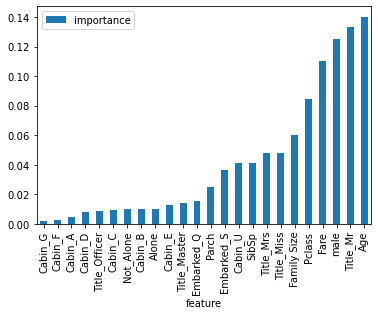

In [53]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = classifier.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind = 'bar')

In [54]:
train_reduced = model.transform(X_train)
print(train_reduced.shape)

NameError: name 'model' is not defined

In [55]:
model = SelectFromModel(classifier, prefit=True,threshold = .011)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

(891, 15)


In [74]:

test_reduced = model.transform(test_df)

NameError: name 'test_df' is not defined

In [57]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []
model_name = []

In [58]:
sc = StandardScaler()
t = sc.fit_transform(train_reduced)
classifier = LogisticRegression()
score = cross_val_score(classifier, t, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print(np.mean(score)*100)
scores.append(np.mean(score))
model_name.append("Logistic Regression")

83.50187265917603


In [59]:
classifier = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("KNN")

81.48314606741573


In [60]:
classifier = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Decision tree")

79.12484394506866


In [61]:
classifier = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Naive Bayees")

82.37578027465669


In [62]:
classifier = SVC()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("SVM")

83.16229712858926


In [63]:
classifier = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Random Forest")

81.3670411985019


In [64]:
s = pd.DataFrame({'Model' : model_name,
              "Score" : scores  
              })
s

,Model,Score
0,Logistic Regression,0.835019
1,KNN,0.814831
2,Decision tree,0.791248
3,Naive Bayees,0.823758
4,SVM,0.831623
5,Random Forest,0.813670


In [65]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'test_reduced' is not defined

In [66]:
train_df = pd.read_csv('train.csv')

In [67]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'test_reduced' is not defined

In [68]:
import csv

In [69]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
#prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'test_reduced' is not defined

In [70]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
#prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'prediction' is not defined

In [71]:
int test_df

SyntaxError: invalid syntax (<ipython-input-71-72c965bf3863>, line 1)

In [72]:
test_df = test_df.fillna("345")


NameError: name 'test_df' is not defined

In [73]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
#prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

CSV generated successfully


In [75]:
test_reduced = model.transform(test_df)

NameError: name 'test_df' is not defined

In [76]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [77]:
pip install xgboost

In [78]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
#prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'prediction' is not defined

In [ ]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

In [ ]:
import xgboost as xgb

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import sys


from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [ ]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

In [79]:
test_reduced = model.transform(test_df)

NameError: name 'test_df' is not defined

In [80]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

NameError: name 'test_reduced' is not defined